In [1]:
# Import the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
raw_df = pd.read_csv(r'C:\Users\soura\Desktop\Resume_Projects\SOCIAL_MEDIA_PROJECT\data\raw\data.csv')
df = raw_df.copy()
df.sample(5)

,Agency,Platform,Url,Date Sampled,Likes/Followers/Visits/Downloads
4912,Probation,YouTube,http://www.youtube.com/NYCProbation,5/9/2012 0:00,NaN
4005,NYC Gov,Foursquare,http://foursquare.com/nycgov,12/12/2012 0:00,NaN
918,DOE,Twitter,http://twitter.com/nyctf,11/2/2012 0:00,1011.0
1234,DOH,Tumblr,http://mygooddognyc.tumblr.com/,7/5/2012 0:00,NaN
1800,DOT,Newsletter,NaN,8/8/2011 0:00,72614.0


In [4]:
# Remove rows with missing data
cleaned_df = df.dropna()

# Droped the irrelevent column 'url'
droped_df = cleaned_df.drop(columns= 'Url')

droped_df.sample(5)

,Agency,Platform,Date Sampled,Likes/Followers/Visits/Downloads
5042,SICB1,Facebook,10/4/2011 0:00,318.0
25,311,iPhone App,12/12/2012 0:00,16879.0
184,CAU,Twitter,11/17/2011 0:00,1449.0
3849,NYC Digital,Tumblr,3/14/2012 0:00,1657.0
2653,GreeNYC,Facebook,6/13/2012 0:00,1508.0


In [5]:
droped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 5278
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Agency                            3896 non-null   object 
 1   Platform                          3896 non-null   object 
 2   Date Sampled                      3896 non-null   object 
 3   Likes/Followers/Visits/Downloads  3896 non-null   float64
dtypes: float64(1), object(3)
memory usage: 152.2+ KB


In [6]:
droped_df['Date Sampled'] = pd.to_datetime(droped_df['Date Sampled'])
droped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3896 entries, 0 to 5278
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Agency                            3896 non-null   object        
 1   Platform                          3896 non-null   object        
 2   Date Sampled                      3896 non-null   datetime64[ns]
 3   Likes/Followers/Visits/Downloads  3896 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 152.2+ KB


In [7]:
droped_df['Month_Sampled'] = droped_df['Date Sampled'].dt.month
droped_df.sample(5)

,Agency,Platform,Date Sampled,Likes/Followers/Visits/Downloads,Month_Sampled
465,DEP,Facebook,2012-12-12,2114.0,12
4573,NYPD News,Twitter,2012-06-13,35936.0,6
1564,thedailypothole,Foursquare,2011-11-17,3.0,11
613,DHS,Facebook,2012-06-13,304.0,6
3558,MOPD,Facebook,2012-11-02,319.0,11


In [8]:
droped_df = droped_df.drop(columns = 'Date Sampled', axis=1)
droped_df.sample(5)

,Agency,Platform,Likes/Followers/Visits/Downloads,Month_Sampled
3588,nycshop,Twitter,279.0,2
3739,NYCgo.fr,Facebook,1265.0,11
2217,NYC Recycles2,Twitter,292.0,10
1866,Pearl_Squirrel (not available),Twitter,195.0,12
4337,NYC Gov,Pinterest,60.0,10


In [9]:
droped_df = droped_df.iloc[:, [0, 1, 3, 2]]
droped_df.sample(5)

,Agency,Platform,Month_Sampled,Likes/Followers/Visits/Downloads
952,DOE,Facebook,5,8327.0
2039,NYC Department of Records,YouTube,11,89.0
5091,Small Business Services,Linked-In,4,137.0
453,DEP,Twitter,6,3503.0
3186,MOAE (not available),Twitter,12,1.0


In [10]:
# Load the cleaned dataset
mo_data = droped_df.copy()
mo_data.sample(5)

,Agency,Platform,Month_Sampled,Likes/Followers/Visits/Downloads
3675,NYCgo.ca,Facebook,8,527.0
3272,YouCanTooNYC,Facebook,5,70.0
1898,NYC Parks,YouTube,11,311.0
3686,NYCgo.de,Facebook,12,389.0
1006,NYC TeachingFellows,Facebook,12,4842.0


In [11]:
# Filter data for Facebook
facebook_data = (mo_data[mo_data['Platform'].isin(['Facebook'])]).drop(columns = 'Platform')

facebook_data.sample(5)

,Agency,Month_Sampled,Likes/Followers/Visits/Downloads
407,DCA,1,396.0
2478,FDNY (Fire Department),11,112432.0
3363,MOME,10,1090.0
3655,NYCgo.br,8,5811.0
2667,HDP,1,59.0


In [12]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1488 entries, 40 to 5238
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Agency                            1488 non-null   object 
 1   Month_Sampled                     1488 non-null   int32  
 2   Likes/Followers/Visits/Downloads  1488 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 40.7+ KB


In [13]:
facebook_agencies = facebook_data['Agency'].unique()
print('The agencies whoever shows items through the facebook platform:\n')
print(facebook_agencies)

The agencies whoever shows items through the facebook platform:

['311' 'ACS' 'CAU' 'CCRB' 'City Charter' 'City Store'
 'Commission on Human Rights' 'Culture' 'DCA' 'DEP' 'DFTA (aging)' 'DFTA'
 'DHS' 'DOB' 'DOB: Cool Roofs' 'DOB: UrbanCanvas' 'DOE' 'NYC Schools'
 'NYC TeachingFellows' 'I teach NYC' 'Eating Healthy NYC' 'Condom Finder'
 'NYCKnows' 'NYCQuites' 'NYC IT & Telecomm'
 'JanetteSadikKhan (Not Available)' 'DOT (Department of Transportaion)'
 'You the Man NYC (not available)' 'NYC Parks' 'Mayor Ed Koch'
 'Mayor Fiorello LaGuardia' 'Mayor John Lindsay'
 'NYC Department of Records' 'DYCD' 'NYC zerowaste' 'Applied Sciences NYC'
 'EDC (New York City Economic Development Corporation)' 'ENDHT'
 'energyNYC' 'FDNY (Fire Department)' 'FUND' 'GreeNYC' 'HDP' 'HHC' 'HIA'
 'HPD/Commission on Human Rights' 'NYC Dad' 'LPC' 'Materials for the Arts'
 'MOIA' "NYC Mayor's Office of Immigrant Affairs" 'WE ARE NEW YORK'
 'YouCanTooNYC' 'MOME' 'MOPD' 'NYCgo' 'NYCgo.au' 'NYCgo.br' 'NYCgo.ca'
 'NYCgo.d

In [14]:
facebook_data.sample(5)

,Agency,Month_Sampled,Likes/Followers/Visits/Downloads
3798,NYCgo.uk,11,1314.0
3632,NYCgo.au,5,496.0
3612,NYCgo,5,42898.0
369,Culture,3,747.0
993,NYC Schools,6,21228.0


# Twitter data collection

In [15]:
mo_data = droped_df.copy()
mo_data.sample(5)

,Agency,Platform,Month_Sampled,Likes/Followers/Visits/Downloads
4198,NYC Waterfront,Twitter,11,420.0
136,ACS,Linked-In,9,1046.0
3407,MOME,Twitter,1,1253.0
2930,LPC,Facebook,4,95.0
4737,OEM (NYC Emergency Management),Twitter,10,575.0


In [16]:
# Filter data for Twitter
twitter_data = (mo_data[mo_data['Platform'].isin(['Twitter'])]).drop(columns = 'Platform')

twitter_data.sample(5)

,Agency,Month_Sampled,Likes/Followers/Visits/Downloads
316,City Store,9,365.0
847,DOE,1,138.0
3303,NYC Mayor's Office of Immigrant Affairs,10,1524.0
86,311,12,9097.0
4366,NYCHA,12,3414.0


In [17]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1223 entries, 60 to 5258
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Agency                            1223 non-null   object 
 1   Month_Sampled                     1223 non-null   int32  
 2   Likes/Followers/Visits/Downloads  1223 non-null   float64
dtypes: float64(1), int32(1), object(1)
memory usage: 33.4+ KB


In [18]:
twitter_agencies = twitter_data['Agency'].unique()
print('The agencies whoever shows items through the twitter platform:\n')
print(twitter_agencies)

The agencies whoever shows items through the twitter platform:

['311' 'CAU' 'Change by Us' 'City Charter' 'City Store' 'DCA' 'DEP'
 'DFTA (aging)' 'DFTA' 'DHS (Homeless Service)' 'DOB' 'DOB: Cool Roofs'
 'DOE' 'DOF' 'NYC Health' 'DOHMH' 'DOI' 'NYC IT & Telecomm'
 'DOT (Department of Transportaion)' 'You the Man NYC (not available)'
 'NYC Parks' 'Pearl_Squirrel (not available)' 'NYC Department of Records'
 'DYCD' 'NYC Recycles2' 'Applied Sciences NYC'
 'EDC (New York City Economic Development Corporation)' 'energyNYC'
 'FDNY (Fire Department)' 'Join FDNY' 'GreeNYC' 'HHC'
 'HRA (Human Resource Administration)' 'NYC LatinMedia' 'LPC'
 'Materials for the Arts' "Mayor's Office" 'MOAE (not available)'
 "NYC Mayor's Office of Immigrant Affairs" 'MOME' 'MOPD' 'NYCgo' 'nycshop'
 'NYC Digital' 'NYC Gov' 'NYC Gov.es' 'NYC Waterfront' 'NYCCFB'
 'NYC Votes' 'NYCDCAS' 'NYCGLOBAL' 'NYCHA' 'NYCService' 'NYPD News'
 'OEM (NYC Emergency Management)' 'PlaNYC' 'Prob' 'SBS'
 'SBS (Business Solutions)' 'SB

In [19]:
twitter_data.sample(5)

,Agency,Month_Sampled,Likes/Followers/Visits/Downloads
4563,NYPD News,10,21861.0
666,DOB,12,2953.0
923,DOE,10,265.0
4368,NYCHA,2,3694.0
2947,LPC,1,309.0


# Create a dataframe that has columns ['Agency', 'Month_Sampled', 'fb_data', 'tw_data']

In [20]:
agency_list = []
for ele in facebook_agencies:
    if ele in twitter_agencies:
        agency_list.append(ele)

print('The agencies whoever shows the items in both facebook and twitter platforms: \n')
print(agency_list)
print(f'\n The length of that agency list is : {len(agency_list)}')

The agencies whoever shows the items in both facebook and twitter platforms: 

['311', 'CAU', 'City Charter', 'City Store', 'DCA', 'DEP', 'DFTA (aging)', 'DFTA', 'DOB', 'DOB: Cool Roofs', 'DOE', 'NYC IT & Telecomm', 'DOT (Department of Transportaion)', 'You the Man NYC (not available)', 'NYC Parks', 'NYC Department of Records', 'DYCD', 'Applied Sciences NYC', 'EDC (New York City Economic Development Corporation)', 'energyNYC', 'FDNY (Fire Department)', 'GreeNYC', 'HHC', 'LPC', 'Materials for the Arts', "NYC Mayor's Office of Immigrant Affairs", 'MOME', 'MOPD', 'NYCgo', 'NYC Gov', 'NYC Votes', 'NYCHA', 'NYCService', 'OEM (NYC Emergency Management)', 'PlaNYC', 'TLC', 'Vets']

 The length of that agency list is : 37


In [21]:
fb_df = facebook_data.copy()
tw_df = twitter_data.copy()

data_sheet = []
value = 0
for agency in agency_list:
    value += 1
    fb_dummy = (fb_df[fb_df['Agency'].isin([agency])]).drop(columns = 'Agency')
    tw_dummy = (tw_df[tw_df['Agency'].isin([agency])]).drop(columns = 'Agency')

    fb_dummy_list = sorted((fb_dummy.values).tolist())             # sorted with respect to month.
    tw_dummy_list = sorted((tw_dummy.values).tolist())

    while(fb_dummy_list and tw_dummy_list):
        lst = [agency]
        val = 0
        if(fb_dummy_list[0][0] == tw_dummy_list[0][0]):
            dummy_lst = [tw_dummy_list[0][0], fb_dummy_list[0][1], tw_dummy_list[0][1]]
            lst.extend(dummy_lst)
            data_sheet.append(lst)
            val = 1
        elif(fb_dummy_list[0][0] > tw_dummy_list[0][0]):
            val = 2
        else:
            val = 3

        if(val == 1):
            fb_dummy_list.pop(0)
            tw_dummy_list.pop(0)
        if(val == 2):
            tw_dummy_list.pop(0)
        if(val == 3):
            fb_dummy_list.pop(0)


print(f'Number of datas presents in the list is : {len(data_sheet)}')

Number of datas presents in the list is : 684


In [22]:
merged_facebook_twitter_data = pd.DataFrame(data_sheet, columns = ['Agency', 'Month_Sampled', 'fb_data', 'tw_data'])
merged_facebook_twitter_data.sample(5)

,Agency,Month_Sampled,fb_data,tw_data
351,energyNYC,1.0,152.0,340.0
419,HHC,10.0,987.0,3435.0
48,City Charter,10.0,284.0,575.0
19,CAU,1.0,300.0,1605.0
633,PlaNYC,4.0,107.0,3327.0


In [23]:
merged_facebook_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agency         684 non-null    object 
 1   Month_Sampled  684 non-null    float64
 2   fb_data        684 non-null    float64
 3   tw_data        684 non-null    float64
dtypes: float64(3), object(1)
memory usage: 21.5+ KB


In [24]:
convert_dict = {'Month_Sampled': int}
merged_facebook_twitter_data = merged_facebook_twitter_data.astype(convert_dict)
merged_facebook_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agency         684 non-null    object 
 1   Month_Sampled  684 non-null    int64  
 2   fb_data        684 non-null    float64
 3   tw_data        684 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 21.5+ KB


In [25]:
merged_facebook_twitter_data.sample(5)

,Agency,Month_Sampled,fb_data,tw_data
574,NYCHA,4,880.0,3880.0
552,NYC Gov,4,7391.0,18652.0
172,DOB: Cool Roofs,9,241.0,391.0
428,LPC,4,95.0,448.0
482,MOME,4,1164.0,7035.0


# Clean the outliers

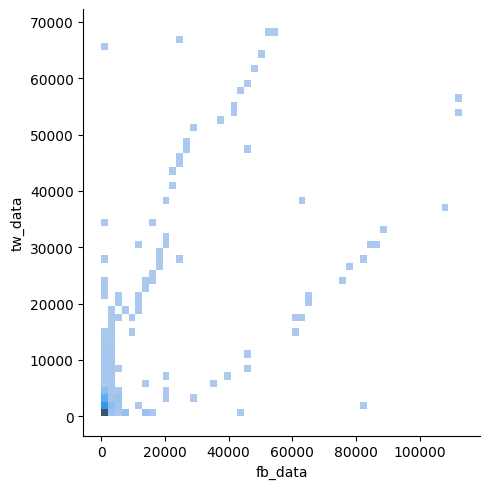

In [26]:
sns.displot(merged_facebook_twitter_data, x="fb_data", y="tw_data")

# Facebook data distribution

<Axes: xlabel='fb_data', ylabel='Count'>

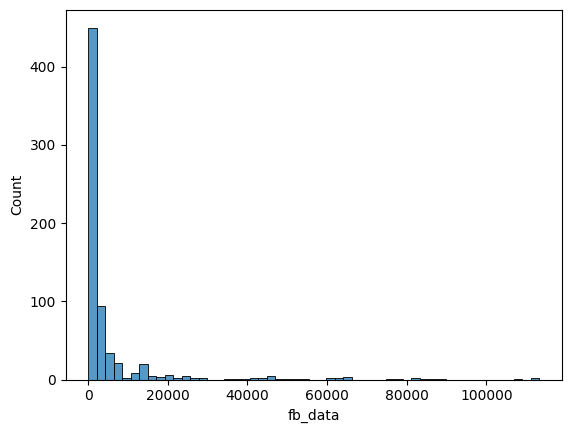

In [27]:
sns.histplot(merged_facebook_twitter_data, x="fb_data")

<Axes: ylabel='fb_data'>

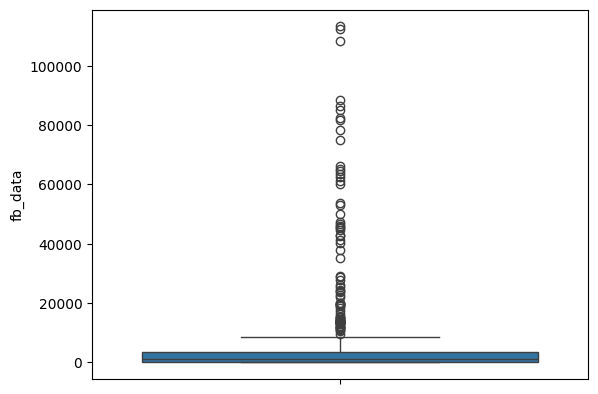

In [28]:
sns.boxplot(merged_facebook_twitter_data['fb_data'])

In [29]:
# Find out the quantiles of the facebook column.

fb_quartiles = merged_facebook_twitter_data["fb_data"].quantile([0.25, 0.50, 0.75])

print(f"The quantiles of the facebook data column is \n{fb_quartiles}")

The quantiles of the facebook data column is 
0.25     292.75
0.50    1079.50
0.75    3544.25
Name: fb_data, dtype: float64


In [30]:
merged_facebook_twitter_data["fb_data"].max()

np.float64(113264.0)

In [31]:
merged_facebook_twitter_data["fb_data"].min()

np.float64(13.0)

In [32]:
merged_facebook_twitter_data["log_fb_data"] = np.log1p(merged_facebook_twitter_data["fb_data"])

In [33]:
merged_facebook_twitter_data["log_fb_data"].min()

np.float64(2.6390573296152584)

In [34]:
merged_facebook_twitter_data["log_fb_data"].max()

np.float64(11.637485484905636)

<Axes: xlabel='log_fb_data', ylabel='Count'>

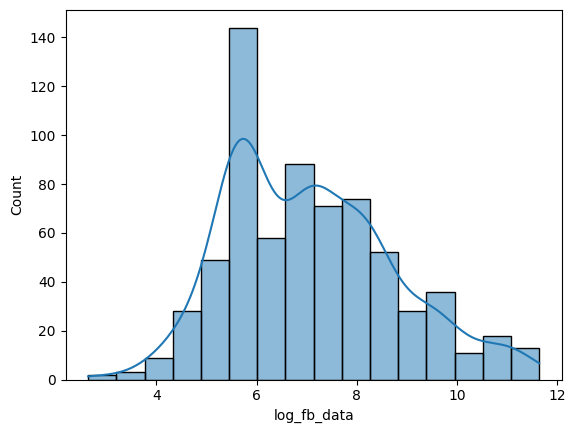

In [35]:
# Apply log tranform for facebook column
sns.histplot(merged_facebook_twitter_data["log_fb_data"], kde=True)

<Axes: xlabel='log_fb_data'>

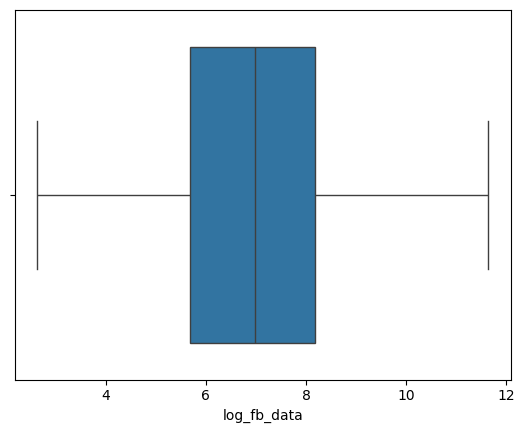

In [36]:
sns.boxplot(merged_facebook_twitter_data, x="log_fb_data")

In [37]:
# Find out the quantiles of the facebook column.

log_fb_quartiles = merged_facebook_twitter_data["log_fb_data"].quantile([0.25, 0.50, 0.75])

print(f"The quantiles of the facebook data column is \n{log_fb_quartiles}")

The quantiles of the facebook data column is 
0.25    5.682728
0.50    6.985178
0.75    8.173358
Name: log_fb_data, dtype: float64


# Twitter data distribution

<Axes: xlabel='tw_data', ylabel='Count'>

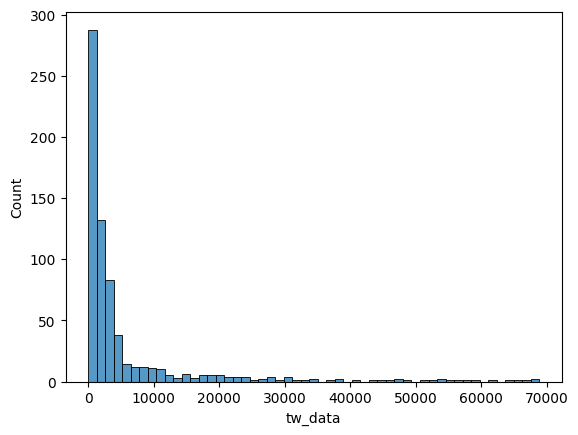

In [38]:
sns.histplot(merged_facebook_twitter_data, x="tw_data")

<Axes: ylabel='tw_data'>

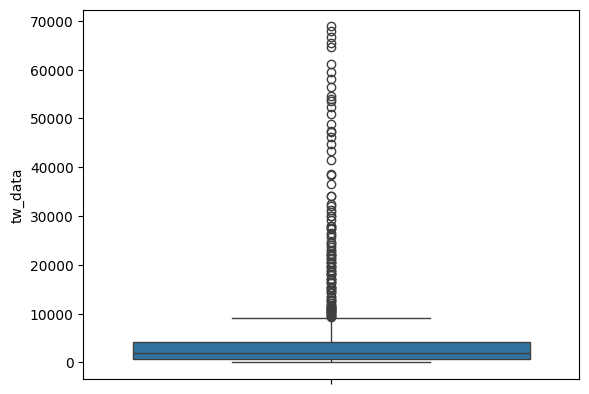

In [39]:
sns.boxplot(merged_facebook_twitter_data['tw_data'])

In [40]:
# Find out the quantiles of the twitter column.

tw_quartiles = merged_facebook_twitter_data["tw_data"].quantile([0.25, 0.50, 0.75])

print(f"The quantiles of the facebook data column is \n{tw_quartiles}")

The quantiles of the facebook data column is 
0.25     586.75
0.50    1877.50
0.75    4087.00
Name: tw_data, dtype: float64


In [41]:
merged_facebook_twitter_data["tw_data"].min()

np.float64(2.0)

In [42]:
merged_facebook_twitter_data["tw_data"].max()

np.float64(68856.0)

In [43]:
merged_facebook_twitter_data["log_tw_data"] = np.log1p(merged_facebook_twitter_data["tw_data"])

In [44]:
merged_facebook_twitter_data["log_tw_data"].min()

np.float64(1.0986122886681098)

In [45]:
merged_facebook_twitter_data["log_tw_data"].max()

np.float64(11.139787169286475)

<Axes: xlabel='log_tw_data', ylabel='Count'>

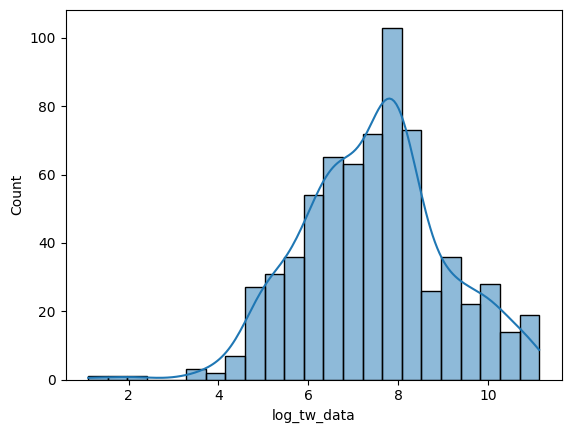

In [46]:
sns.histplot(merged_facebook_twitter_data["log_tw_data"], kde=True)

<Axes: xlabel='log_tw_data'>

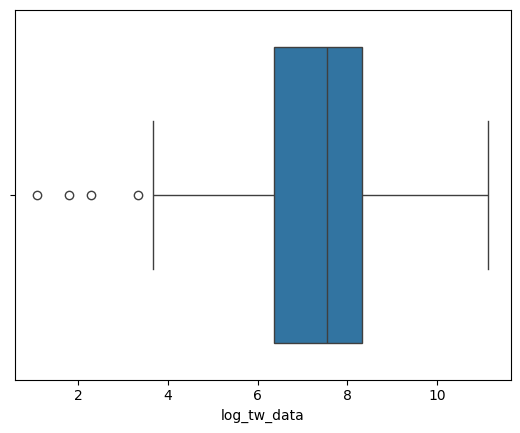

In [47]:
sns.boxplot(merged_facebook_twitter_data, x="log_tw_data")

In [48]:
# Find out the quantiles of the twitter column.

log_tw_quartiles = merged_facebook_twitter_data["log_tw_data"].quantile([0.25, 0.50, 0.75])

print(f"The quantiles of the facebook data column is \n{log_tw_quartiles}")

The quantiles of the facebook data column is 
0.25    6.376301
0.50    7.538229
0.75    8.315810
Name: log_tw_data, dtype: float64


In [49]:
merged_facebook_twitter_data.sample(5)

,Agency,Month_Sampled,fb_data,tw_data,log_fb_data,log_tw_data
294,NYC Department of Records,10,78.0,65.0,4.369448,4.189655
43,City Charter,7,289.0,805.0,5.669881,6.692084
336,EDC (New York City Economic Development Corpor...,4,3251.0,7767.0,8.087025,8.957768
643,PlaNYC,11,58.0,2294.0,4.077537,7.738488
296,NYC Department of Records,11,78.0,75.0,4.369448,4.330733


In [50]:
merged_facebook_twitter_data = merged_facebook_twitter_data[["Agency", "Month_Sampled", "log_fb_data", "log_tw_data"]]
merged_facebook_twitter_data.sample(5)

,Agency,Month_Sampled,log_fb_data,log_tw_data
511,MOME,12,7.853993,8.682877
77,DCA,5,6.198479,7.643483
252,DOT (Department of Transportaion),11,8.482188,9.922604
441,Materials for the Arts,1,7.836370,7.392648
638,PlaNYC,8,5.459586,8.261268


# Remove outliers

In [51]:
removed_outliers_data = merged_facebook_twitter_data.copy()

In [52]:
removed_outliers_data.sample(5)

,Agency,Month_Sampled,log_fb_data,log_tw_data
601,NYCService,9,8.704171,8.275122
229,NYC IT & Telecomm,9,5.568345,7.590852
362,energyNYC,9,5.730100,6.811244
177,DOB: Cool Roofs,11,6.364751,7.030857
209,DOE,10,9.033006,6.884487


In [53]:
# For 'feature_name_log'
Q1_feature = removed_outliers_data['log_fb_data'].quantile(0.25)
Q3_feature = removed_outliers_data['log_fb_data'].quantile(0.75)
IQR_feature = Q3_feature - Q1_feature
lower_bound_feature = Q1_feature - (1.5 * IQR_feature)
upper_bound_feature = Q3_feature + (1.5 * IQR_feature)

# For 'target_variable_log'
Q1_target = removed_outliers_data['log_tw_data'].quantile(0.25)
Q3_target = removed_outliers_data['log_tw_data'].quantile(0.75)
IQR_target = Q3_target - Q1_target
lower_bound_target = Q1_target - (1.5 * IQR_target)
upper_bound_target = Q3_target + (1.5 * IQR_target)

print(f"Feature: Lower Bound = {lower_bound_feature:.2f}, Upper Bound = {upper_bound_feature:.2f}")
print(f"Target: Lower Bound = {lower_bound_target:.2f}, Upper Bound = {upper_bound_target:.2f}")

Feature: Lower Bound = 1.95, Upper Bound = 11.91
Target: Lower Bound = 3.47, Upper Bound = 11.23


In [54]:
# Handling outliers (capping example):
removed_outliers_data['log_fb_data'] = np.where(removed_outliers_data['log_fb_data'] > upper_bound_feature,
                                                upper_bound_feature,
                                                np.where(removed_outliers_data['log_fb_data'] < lower_bound_feature,
                                                        lower_bound_feature,
                                                        removed_outliers_data['log_fb_data']))

removed_outliers_data['log_tw_data'] = np.where(removed_outliers_data['log_tw_data'] > upper_bound_target,
                                                upper_bound_target,
                                                np.where(removed_outliers_data['log_tw_data'] < lower_bound_target,
                                                        lower_bound_target,
                                                        removed_outliers_data['log_tw_data']))

In [55]:
removed_outliers_data["log_fb_data"].min()

np.float64(2.6390573296152584)

In [56]:
removed_outliers_data["log_fb_data"].max()

np.float64(11.637485484905636)

<Axes: xlabel='log_fb_data', ylabel='Count'>

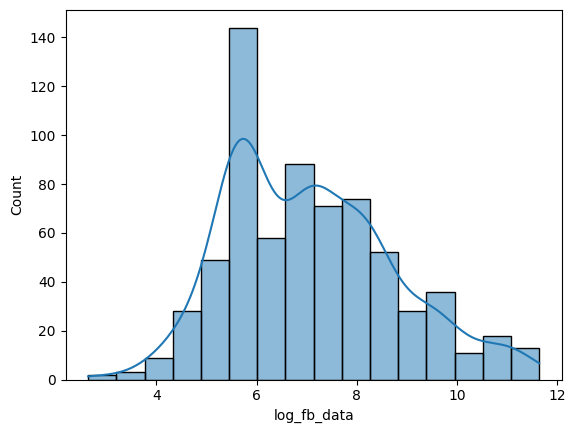

In [57]:
sns.histplot(removed_outliers_data, x="log_fb_data", kde=True)

<Axes: xlabel='log_fb_data'>

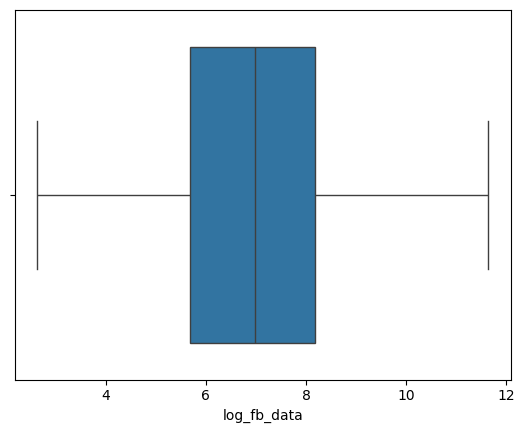

In [58]:
sns.boxplot(removed_outliers_data, x="log_fb_data")

In [59]:
removed_outliers_data["log_tw_data"].min()

np.float64(3.4670380524165423)

In [60]:
removed_outliers_data["log_tw_data"].max()

np.float64(11.139787169286475)

<Axes: xlabel='log_tw_data', ylabel='Count'>

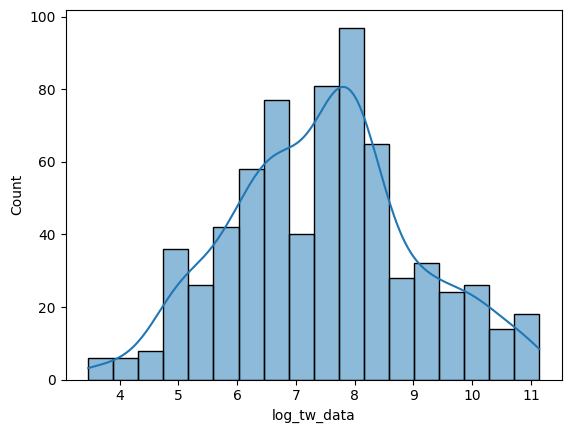

In [61]:
sns.histplot(removed_outliers_data["log_tw_data"], kde=True)

<Axes: xlabel='log_tw_data'>

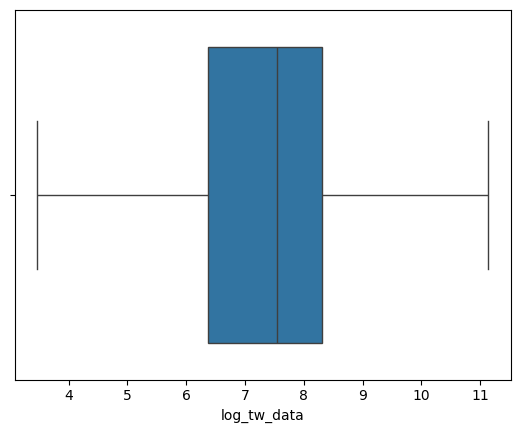

In [62]:
sns.boxplot(removed_outliers_data, x="log_tw_data")

In [63]:
removed_outliers_data.sample(5)

,Agency,Month_Sampled,log_fb_data,log_tw_data
409,HHC,4,7.017506,7.803027
488,MOME,7,7.109062,7.881937
113,DFTA (aging),4,5.231109,6.444131
630,PlaNYC,2,4.343805,7.962416
103,DEP,10,7.610358,8.350194


In [64]:
removed_outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agency         684 non-null    object 
 1   Month_Sampled  684 non-null    int64  
 2   log_fb_data    684 non-null    float64
 3   log_tw_data    684 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 21.5+ KB


# Train-test split

In [65]:
X = removed_outliers_data.drop(columns=["log_tw_data"])
y = removed_outliers_data["log_tw_data"]

In [91]:
X.sample(10)

,Agency,Month_Sampled,log_fb_data
597,NYCService,7,8.661120
563,NYC Votes,4,4.553877
357,energyNYC,6,5.402677
204,DOE,10,7.499423
637,PlaNYC,8,3.871201
293,NYC Department of Records,9,4.330733
675,Vets,8,5.552960
206,DOE,10,7.516433
124,DFTA (aging),11,5.552960
498,MOME,10,6.991177


In [92]:
np.expm1(7.516)

np.float64(1836.2037617597011)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
print(f'X-Train data shape : {X_train.shape}, y-train data shape : {y_train.shape}' )
print(f'X-test data shape : {X_test.shape}, y-test data shape : {y_test.shape}')

X-Train data shape : (581, 3), y-train data shape : (581,)
X-test data shape : (103, 3), y-test data shape : (103,)


In [90]:
X_test

,Agency,Month_Sampled,log_fb_data
430,LPC,5,4.744932
23,CAU,5,5.918894
189,DOE,4,9.027259
47,City Charter,9,5.680173
362,energyNYC,9,5.730100
...,...,...,...
598,NYCService,8,8.479076
373,FDNY (Fire Department),4,11.309450
34,CAU,11,6.329721
464,NYC Mayor's Office of Immigrant Affairs,8,6.122493


In [7]:
np.expm1(11.30)

np.float64(80820.6375403136)

In [94]:
y_test

430    11.087543
23      7.544332
189     5.929589
47      6.766192
362     6.811244
         ...    
598     7.430114
373    10.218298
34      7.857868
464     7.738052
402     7.703008
Name: log_tw_data, Length: 103, dtype: float64

In [8]:
np.expm1(10.21)

np.float64(27172.56758944074)

# Create the preprocessor

In [68]:
categorical_features = ["Agency", "Month_Sampled"]
numerical_features = ["log_fb_data"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("num", "passthrough", numerical_features)
])

# Decision tree regressor

In [69]:
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=0))
])


pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [70]:
y_pred = pipeline.predict(X_test)

log_rsme = root_mean_squared_error(y_test, y_pred)
print(f"The root mean square score for Decision Tree is {log_rsme}")

log_r2_score_val = r2_score(y_test, y_pred)
print(f"The R2 score for Decision Tree is {log_r2_score_val}")

The root mean square score for Decision Tree is 0.8418606529797289
The R2 score for Decision Tree is 0.7488879829426812


In [71]:
DT_rsme = root_mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
print(f"The root mean square score for Decision Tree is {DT_rsme}")

DT_r2_score_val = r2_score(np.expm1(y_test), np.expm1(y_pred))
print(f"The R2 score for Decision Tree is {DT_r2_score_val}")

The root mean square score for Decision Tree is 8003.705170650341
The R2 score for Decision Tree is 0.6750821416845598


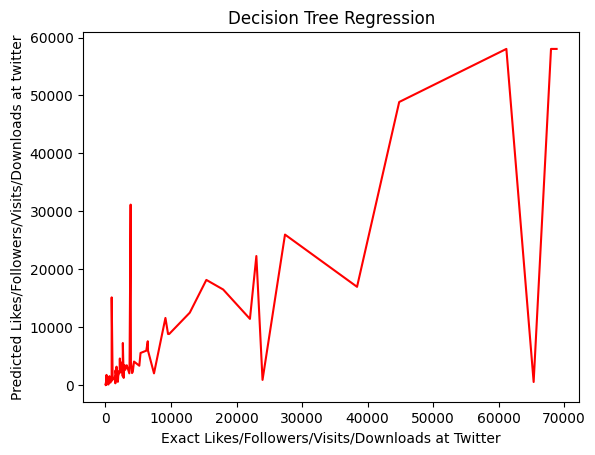

In [72]:
dummy_arr = np.concatenate((np.expm1(y_test).values.reshape(-1, 1), np.expm1(y_pred).reshape(-1, 1)), axis = 1)
dummy_arr_list = sorted(dummy_arr.tolist())
sorted_arr = np.array(dummy_arr_list)
plt.plot(sorted_arr[:,0], sorted_arr[:,1], color='r')
plt.xlabel('Exact Likes/Followers/Visits/Downloads at Twitter')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('Decision Tree Regression')
plt.show()

# Random Forset

In [73]:
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])


pipeline.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [74]:
y_pred = pipeline.predict(X_test)

log_rsme = root_mean_squared_error(y_test, y_pred)
print(f"The root mean square score for Decision Tree is {log_rsme}")

log_r2_score_val = r2_score(y_test, y_pred)
print(f"The R2 score for Decision Tree is {log_r2_score_val}")

The root mean square score for Decision Tree is 0.8066233697639318
The R2 score for Decision Tree is 0.7694693506633834


In [75]:
RF_rsme = root_mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
print(f"The root mean square score for Decision Tree is {RF_rsme}")

RF_r2_score_val = r2_score(np.expm1(y_test), np.expm1(y_pred))
print(f"The R2 score for Decision Tree is {RF_r2_score_val}")

The root mean square score for Decision Tree is 7597.644565639736
The R2 score for Decision Tree is 0.7072146365796096


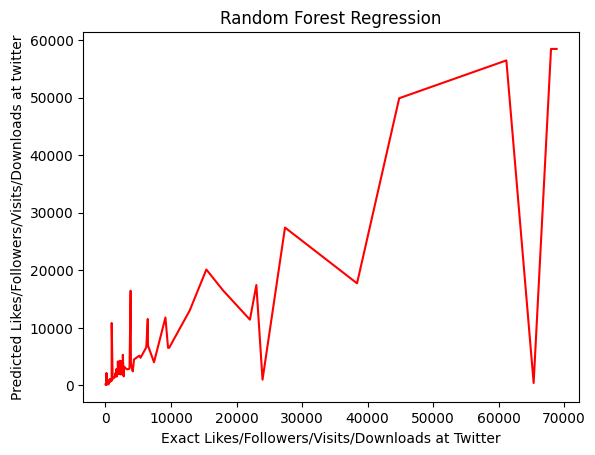

In [76]:
dummy_arr = np.concatenate((np.expm1(y_test).values.reshape(-1, 1), np.expm1(y_pred).reshape(-1, 1)), axis = 1)
dummy_arr_list = sorted(dummy_arr.tolist())
sorted_arr = np.array(dummy_arr_list)
plt.plot(sorted_arr[:,0], sorted_arr[:,1], color='r')
plt.xlabel('Exact Likes/Followers/Visits/Downloads at Twitter')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('Random Forest Regression')
plt.show()

# Xgboost regressor

In [77]:
# Define the XGBoost Regressor (use XGBRegressor for regression tasks)
xgb_regressor = XGBRegressor(objective='reg:squarederror',    # Common objective for regression
                             random_state=42,
                             n_jobs=-1)                        # Use all available CPU cores


In [78]:
pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", xgb_regressor)                 # The XGBoost regressor is now part of the pipeline
])


In [79]:
# Define the Parameter Grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1, 0.3],
    'regressor__subsample': [0.7, 0.8, 0.9],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9],
    'regressor__gamma': [0, 0.1, 0.2]
}


In [80]:
# Initialize and Run GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           cv=5,                                       # 5-fold cross-validation
                           scoring='neg_mean_squared_error',           # Use negative mean squared error for minimization
                           verbose=1,                                  # Print progress messages
                           n_jobs=-1)                                  # Use all available cores for parallel processing


In [81]:
print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completed.")

Starting GridSearchCV...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
GridSearchCV completed.


In [82]:
# 6. Evaluate the Best Model
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)


Best parameters found:  {'regressor__colsample_bytree': 0.9, 'regressor__gamma': 0, 'regressor__learning_rate': 0.3, 'regressor__max_depth': 3, 'regressor__n_estimators': 100, 'regressor__subsample': 0.7}
Best cross-validation score (negative MSE):  -0.3969648326304839


In [83]:
# The best estimator is available as best_estimator_
best_xgb_model = grid_search.best_estimator_

# Make predictions on the test set (this automatically applies preprocessing)
y_pred = best_xgb_model.predict(X_test)

In [84]:
log_rsme = root_mean_squared_error(y_test, y_pred)
print(f"The root mean square score for Decision Tree is {log_rsme}")

log_r2_score_val = r2_score(y_test, y_pred)
print(f"The R2 score for Decision Tree is {log_r2_score_val}")

The root mean square score for Decision Tree is 0.8207901171676939
The R2 score for Decision Tree is 0.7613006095206619


In [85]:
XGB_rsme = root_mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
print(f"The root mean square score for Decision Tree is {XGB_rsme}")

XGB_r2_score_val = r2_score(np.expm1(y_test), np.expm1(y_pred))
print(f"The R2 score for Decision Tree is {XGB_r2_score_val}")

The root mean square score for Decision Tree is 8159.296493501454
The R2 score for Decision Tree is 0.6623266028838775


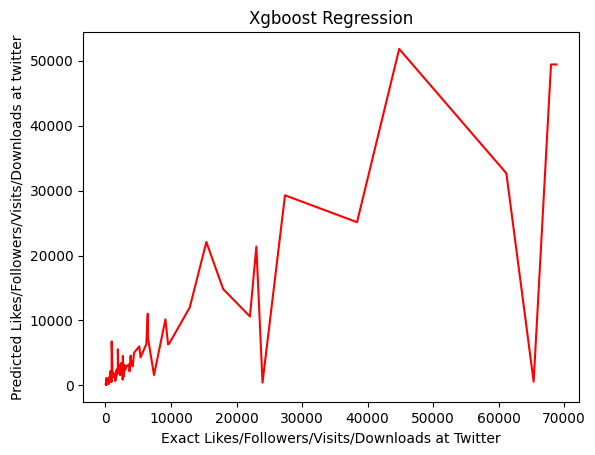

In [86]:
dummy_arr = np.concatenate((np.expm1(y_test).values.reshape(-1, 1), np.expm1(y_pred).reshape(-1, 1)), axis = 1)
dummy_arr_list = sorted(dummy_arr.tolist())
sorted_arr = np.array(dummy_arr_list)
plt.plot(sorted_arr[:,0], sorted_arr[:,1], color='r')
plt.xlabel('Exact Likes/Followers/Visits/Downloads at Twitter')
plt.ylabel('Predicted Likes/Followers/Visits/Downloads at twitter')
plt.title('Xgboost Regression')
plt.show()

# Visualize the metrices of each of algorithms

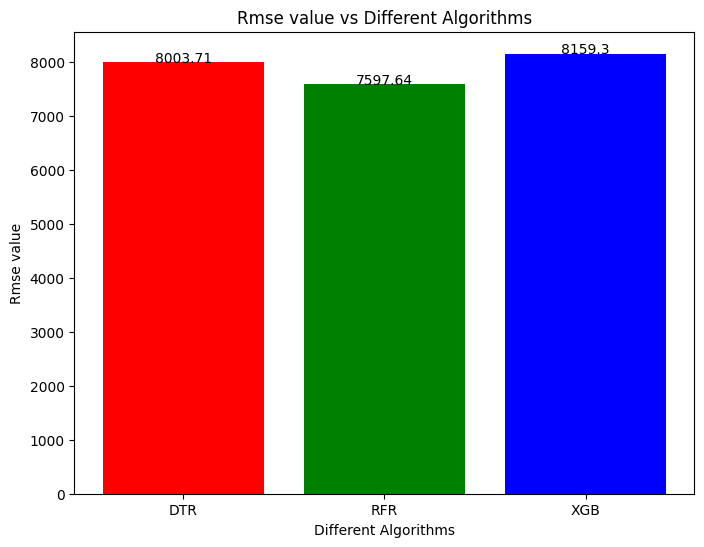

In [87]:
rmse_list = [DT_rsme, RF_rsme, XGB_rsme]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['DTR', 'RFR', 'XGB']
    y = rmse_list

    # setting figure size by using figure() function
    plt.figure(figsize = (8, 6))

    # making the bar chart on the data
    plt.bar(x, y, width = 0.8, color = ['red', 'green', 'blue'])

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title('Rmse value vs Different Algorithms')

    # giving X and Y labels
    plt.xlabel('Different Algorithms')
    plt.ylabel('Rmse value')

    # visualizing the plot
    plt.show()

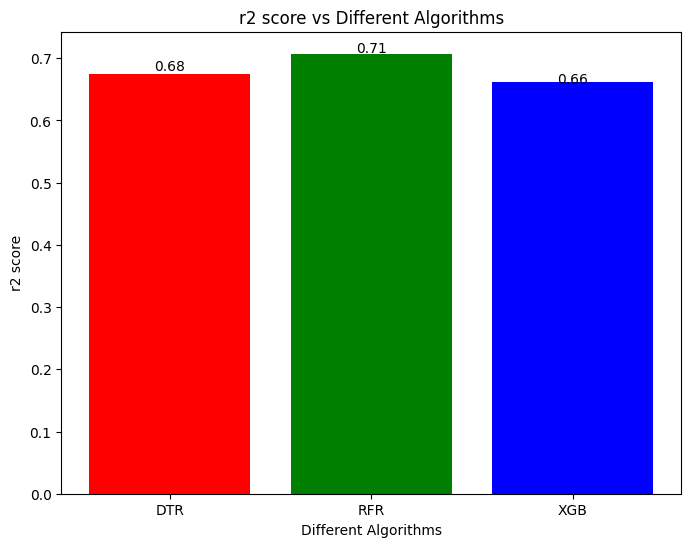

In [88]:
r2_score_list = [DT_r2_score_val, RF_r2_score_val, XGB_r2_score_val]

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['DTR', 'RFR', 'XGB']
    y = r2_score_list

    # setting figure size by using figure() function
    plt.figure(figsize = (8, 6))

    # making the bar chart on the data
    plt.bar(x, y, width = 0.8, color = ['red', 'green', 'blue'])

    # calling the function to add value labels
    addlabels(x, y)

    # giving title to the plot
    plt.title('r2 score vs Different Algorithms')

    # giving X and Y labels
    plt.xlabel('Different Algorithms')
    plt.ylabel('r2 score')

    # visualizing the plot
    plt.show()

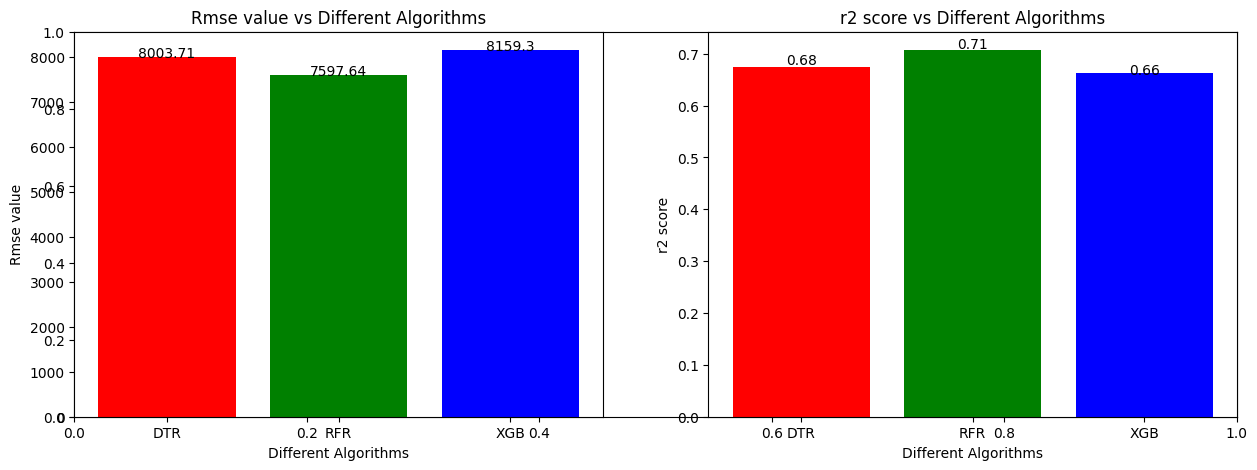

In [89]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, round(y[i], 2), round(y[i], 2), ha = 'center')

if __name__ == '__main__':

    # creating data on which bar chart will be plot
    x = ['DTR', 'RFR', 'XGB']
    y1 = rmse_list
    y2 = r2_score_list

    plt.subplots(figsize=(15, 5))

    # using subplot function and creating
    # plot one
    plt.subplot(1, 2, 1)
    plt.bar(x, y1, width = 0.8, color = ['red', 'green', 'blue'])
    addlabels(x, y1)
    plt.title('Rmse value vs Different Algorithms')
    plt.xlabel('Different Algorithms')
    plt.ylabel('Rmse value')

    # using subplot function and creating plot two
    plt.subplot(1, 2, 2)
    plt.bar(x, y2, width = 0.8, color = ['red', 'green', 'blue'])
    addlabels(x, y2)
    plt.title('r2 score vs Different Algorithms')
    plt.xlabel('Different Algorithms')
    plt.ylabel('r2 score')
    plt.show()